In [13]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

C:\Users\BHAVYA SHAH\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [15]:
TRAINING_DIR = "C:/Users/BHAVYA SHAH/Desktop/MachineLearning/dogs-vs-cats/train"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 25000 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=90)

Epoch 1/15
90/90 [==============================] - 304s 3s/step - loss: 0.7928 - acc: 0.6000
Epoch 2/15
90/90 [==============================] - 169s 2s/step - loss: 0.5873 - acc: 0.6933
Epoch 3/15
90/90 [==============================] - 155s 2s/step - loss: 0.5329 - acc: 0.7317
Epoch 4/15
90/90 [==============================] - 155s 2s/step - loss: 0.4828 - acc: 0.7704
Epoch 5/15
90/90 [==============================] - 154s 2s/step - loss: 0.4403 - acc: 0.7956
Epoch 6/15
90/90 [==============================] - 147s 2s/step - loss: 0.4151 - acc: 0.8071
Epoch 7/15
90/90 [==============================] - 145s 2s/step - loss: 0.3707 - acc: 0.8288
Epoch 8/15
90/90 [==============================] - 148s 2s/step - loss: 0.3413 - acc: 0.8469
Epoch 9/15
90/90 [==============================] - 144s 2s/step - loss: 0.2972 - acc: 0.8717
Epoch 10/15
90/90 [==============================] - 157s 2s/step - loss: 0.2517 - acc: 0.8938
Epoch 11/15
90/90 [==============================] - 152s 2

In [ ]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(150, 150))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0]>0.5:
#     print(fn + " is a dog")
#   else:
#     print(fn + " is a cat")

<Figure size 432x288 with 0 Axes>

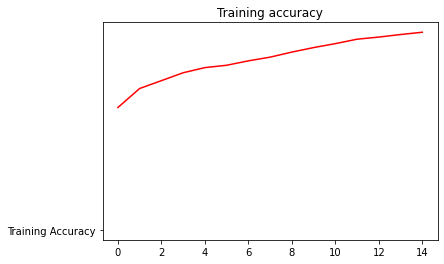

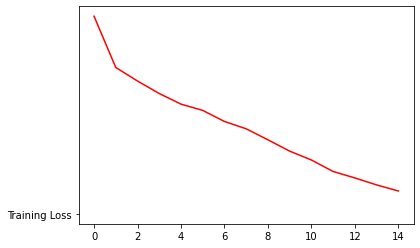

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
loss=history.history['loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.title('Training accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)